# Extracting Dataset



In [73]:
from pymongo import MongoClient
import pandas as pd

def extract_data_from_mongodb(HealthCare, DeathRelatedDrug):
    # Connect to MongoDB
    client = MongoClient('localhost', 27017)
    db = client[HealthCare]
    collection = db[DeathRelatedDrug]

    try:
        # Extract data from MongoDB collection
        data = list(collection.find())
        print("Data extracted successfully from MongoDB.")
        return data
    except Exception as e:
        print("An error occurred:", e)
    finally:
        # Close the MongoDB connection
        client.close()

# Example usage
extracted_data = extract_data_from_mongodb('HealthCare', 'DeathRelatedDrug')



Data extracted successfully from MongoDB.


In [74]:
# Convert data to DataFrame
df = pd.DataFrame(extracted_data)




In [75]:
# Print DataFrame
print(df.head())

                        _id CaseNumber        Date     Sex   Race Age  \
0  66267d31da81114bd3e4b661   13-16336  11/09/2013  Female  White  53   
1  66267d31da81114bd3e4b662   12-18447  12/29/2012    Male  White  30   
2  66267d31da81114bd3e4b663    14-2758  02/18/2014    Male  White  43   
3  66267d31da81114bd3e4b664   14-13497  09/07/2014  Female  White  24   
4  66267d31da81114bd3e4b665   13-14421  10/04/2013  Female  White  26   

  Residence City Residence State Residence County   Death City  ...  \
0         GROTON                       NEW LONDON       GROTON  ...   
1        WOLCOTT                        NEW HAVEN    WATERBURY  ...   
2        ENFIELD                                       ENFIELD  ...   
3    WALLINGFORD                                   WALLINGFORD  ...   
4     WEST HAVEN                        NEW HAVEN   WEST HAVEN  ...   

  Benzodiazepine Methadone Amphet Tramad Morphine (not heroin) Other  \
0              Y                                              

In [76]:
import pymongo
import pandas as pd

# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")  # Replace with your MongoDB connection URI
db = client["HealthCare"]  # Replace "HealthCare" with your database name
collection = db["DeathRelatedDrug"]  # Replace "DeathRelatedDrug" with your collection name

# Query MongoDB to retrieve data
cursor = collection.find({})  # You can add filters here if needed

# Convert MongoDB cursor to DataFrame
df = pd.DataFrame(list(cursor))

# Close MongoDB connection
client.close()

# Display the DataFrame
print(df.head())


                        _id CaseNumber        Date     Sex   Race Age  \
0  66267d31da81114bd3e4b661   13-16336  11/09/2013  Female  White  53   
1  66267d31da81114bd3e4b662   12-18447  12/29/2012    Male  White  30   
2  66267d31da81114bd3e4b663    14-2758  02/18/2014    Male  White  43   
3  66267d31da81114bd3e4b664   14-13497  09/07/2014  Female  White  24   
4  66267d31da81114bd3e4b665   13-14421  10/04/2013  Female  White  26   

  Residence City Residence State Residence County   Death City  ...  \
0         GROTON                       NEW LONDON       GROTON  ...   
1        WOLCOTT                        NEW HAVEN    WATERBURY  ...   
2        ENFIELD                                       ENFIELD  ...   
3    WALLINGFORD                                   WALLINGFORD  ...   
4     WEST HAVEN                        NEW HAVEN   WEST HAVEN  ...   

  Benzodiazepine Methadone Amphet Tramad Morphine (not heroin) Other  \
0              Y                                              

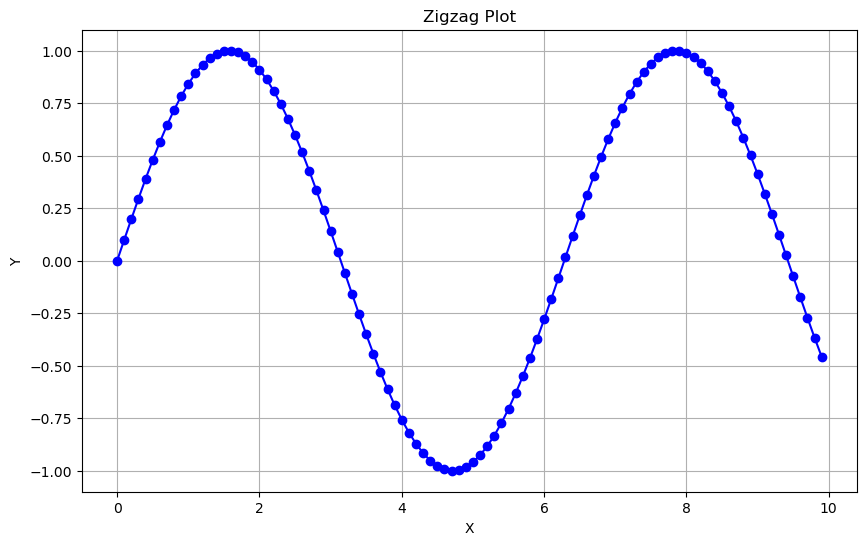

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
x = np.arange(0, 10, 0.1)
y = np.sin(x)

# Create a zigzag plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, linestyle='-', marker='o', color='blue')
plt.title('Zigzag Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


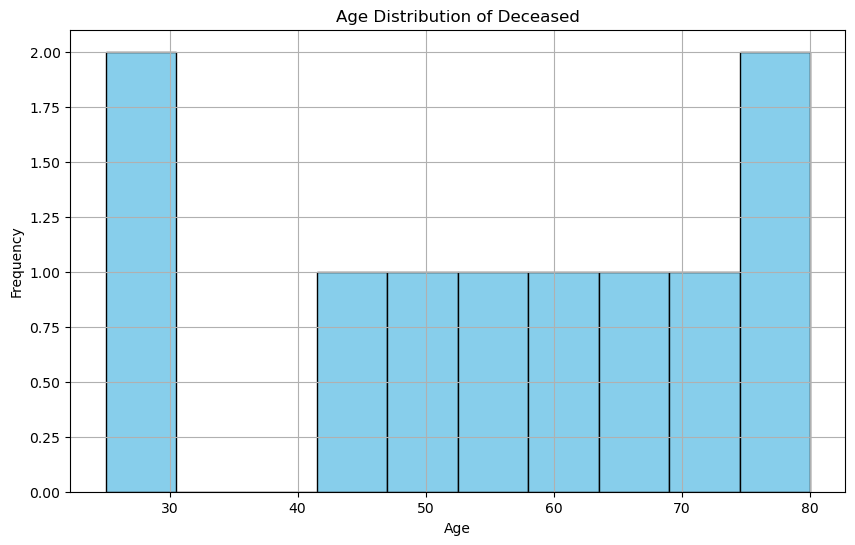

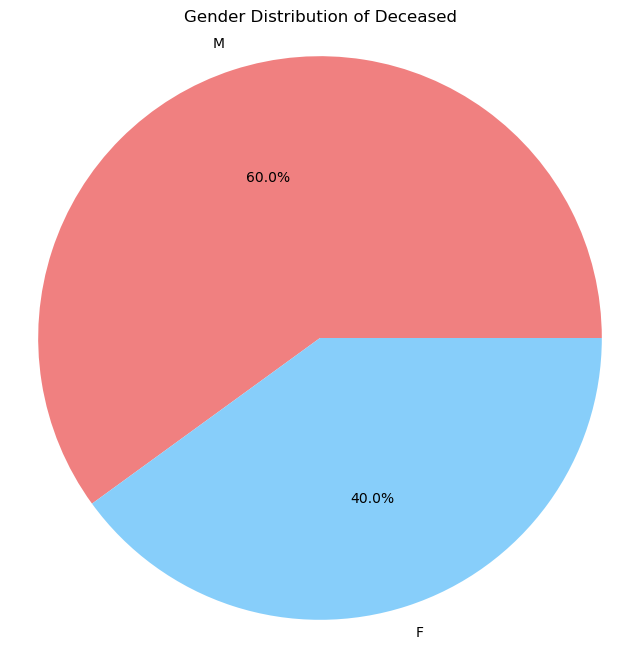

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'Age' and 'Sex'

# Generate some sample data (replace this with your actual data)
data = {
    'Age': [25, 30, 45, 50, 55, 60, 65, 70, 75, 80],
    'Sex': ['M', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'M']
}
df = pd.DataFrame(data)

# Visualize age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Deceased')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualize gender distribution
gender_counts = df['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution of Deceased')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [108]:



import folium
import pandas as pd
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')  # Update with your MongoDB connection URI
db = client['HealthCare']  # Update with your database name
collection = db['DeathReleatedDrug']  # Update with your collection name

# Query data from MongoDB
cursor = collection.find({})  # Example: Retrieve all documents
data = list(cursor)

# Create a DataFrame
df = pd.DataFrame(data)

# Create a map centered around a specific location
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)  # Example: Centered around New York City

# Add markers for each data point (assuming latitude and longitude columns exist in DataFrame)
for index, row in df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['location_name']).add_to(m)

# Display the map
m



In [113]:
df['DeathLoc_latitude'] = df['DeathLoc'].str.extract(r'(\d+\.\d+)', expand=True).values.astype(np.float32)
df['DeathLoc_longitude'] = -df['DeathLoc'].str.split(' -').str[1].str[:-1].astype(np.float32)

KeyError: 'DeathLoc'

In [110]:
# Create map around the mean position
central_position = [df['deathloc_latitude'].mean(), df['deathloc_longitude'].mean()]
locations_map = folium.Map(location=central_position, zoom_start = 9)

# Colors for the different drug types
i = 0
pal = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'darkblue', 'darkgreen', 'cadetblue', 
       'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Add markers to the map according to their drug type
for drug in df['drug_type'].unique():
    
    drug_df = df[df['drug_type'] == drug]
    
    # Not interested in adding markers for 'other'
    if drug == 'other':  
        continue
        
    for case in drug_df.index[:30]:
        folium.Marker([drug_df.loc[case, 'deathloc_latitude'], drug_df.loc[case, 'deathloc_longitude']],
                       popup=drug_df.loc[case, 'drug_type'],
                       icon=folium.Icon(color=pal[i], icon='circle', prefix='fa')
                     ).add_to(locations_map)
    i += 1
locations_map


# Create map around the mean position
central_position = [df['latitude'].mean(), df['longitude'].mean()]
locations_map = folium.Map(location=central_position, zoom_start=9)


KeyError: 'deathloc_latitude'

# Data Understanding 

In [82]:
import pymongo
import pandas as pd
# Function to connect to MongoDB and retrieve data
def retrieve_data_from_mongodb(HealthCare, DeathRelatedDrug):
    # Establish connection to MongoDB
    client = MongoClient('localhost', 27017)
    db = client[db_name]
    collection = db[collection_name]

    
    # Query the collection to fetch data
    cursor = collection.find({})
    
    # Convert cursor to a list of dictionaries
    data = list(cursor)
    
    # Close the connection
    client.close()
    
    return data



In [83]:
import pandas as pd
import pymongo

def retrieve_data_from_mongodb(db_name, collection_name):
    # Establish connection to MongoDB
    client = pymongo.MongoClient("localhost", 27017)
    
    # Access the database
    db = client[db_name]
    
    # Access the collection
    collection = db[collection_name]
    
    # Retrieve all documents from the collection
    cursor = collection.find({})
    
    # Convert cursor to list of dictionaries
    data = list(cursor)
    
    return data

def data_understanding(data):
    # Convert data to DataFrame
    df = pd.DataFrame(data)
    
    # Display basic statistics
    statistics = df.describe()
    statistics_styled = statistics.style.set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('color', 'black'), ('border', '1px solid #ddd')]},
        {'selector': 'td', 'props': [('border', '1px solid #ddd')]},
        {'selector': 'caption', 'props': [('font-size', '14px'), ('color', 'black'), ('font-weight', 'bold')]}
    ])
    
    # Display data types and missing values
    data_info = df.info()
    
    return statistics_styled, data_info

# Define the database name and collection name
db_name = "HealthCare"
collection_name = "DeathRelatedDrug"

# Retrieve data from MongoDB
data = retrieve_data_from_mongodb(db_name, collection_name)

# Perform data understanding and display the results
statistics_styled, data_info = data_understanding(data)

# Display styled statistics table
statistics_styled


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   _id                    4081 non-null   object
 1   CaseNumber             4081 non-null   object
 2   Date                   4081 non-null   object
 3   Sex                    4081 non-null   object
 4   Race                   4081 non-null   object
 5   Age                    4081 non-null   object
 6   Residence City         4081 non-null   object
 7   Residence State        4081 non-null   object
 8   Residence County       4081 non-null   object
 9   Death City             4081 non-null   object
 10  Death State            4081 non-null   object
 11  Death County           4081 non-null   object
 12  Location               4081 non-null   object
 13  DescriptionofInjury    4081 non-null   object
 14  InjuryPlace            4081 non-null   object
 15  ImmediateCauseA      

,_id,CaseNumber,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,Death County,Location,DescriptionofInjury,InjuryPlace,ImmediateCauseA,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc
count,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081
unique,4081,4078,1764,3,12,63,450,20,85,307,10,18,6,115,68,2155,3,3,6,3,2,3,3,3,3,2,2,6,96,4,6,437,338
top,66267d31da81114bd3e4b661,17-538,08/18/2017,Male,White,29,HARTFORD,CT,HARTFORD,HARTFORD,,,Residence,,Residence,Substance Abuse,Y,,,,,,,,,,,,,,Accident,,"HARTFORD, CT (41.765775, -72.673356)"
freq,1,2,9,2991,3243,121,206,2052,784,371,1881,1182,2123,2588,2833,276,2122,2908,2617,3551,3985,3161,3977,3052,3696,3979,3991,4043,3736,3388,4047,3543,313


# Performing Data Cleaning

In [84]:
import json
import pandas as pd

# Load the JSON dataset
with open('death_related_drug.json', 'r') as f:
    data = json.load(f)

# Convert the data to a DataFrame
df = pd.DataFrame(data)


In [85]:
# 1. Handle Missing Values
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

# Handle missing values based on your specific scenario (imputation, removal, etc.)



Missing values:
Date                             0
Date Type                        0
Age                              0
Sex                              0
Race                             0
Ethnicity                        0
Residence City                   0
Residence County                 0
Residence State                  0
Injury City                      0
Injury County                    0
Injury State                     0
Injury Place                     0
Description of Injury            0
Death City                       0
Death County                     0
Death State                      0
Location                         0
Location if Other                0
Cause of Death                   0
Manner of Death                  0
Other Significant Conditions     0
Heroin                           0
Heroin death certificate (DC)    0
Cocaine                          0
Fentanyl                         0
Fentanyl Analogue                0
Oxycodone                        0
Oxym

In [86]:
# 2. Handle Duplicate Records
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nDuplicate rows:")
print(duplicate_rows)

# Remove duplicate rows
df.drop_duplicates(inplace=True)




Duplicate rows:
0


In [87]:
# 3. Convert Data Types
# Check data types of columns
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
Date                             object
Date Type                        object
Age                              object
Sex                              object
Race                             object
Ethnicity                        object
Residence City                   object
Residence County                 object
Residence State                  object
Injury City                      object
Injury County                    object
Injury State                     object
Injury Place                     object
Description of Injury            object
Death City                       object
Death County                     object
Death State                      object
Location                         object
Location if Other                object
Cause of Death                   object
Manner of Death                  object
Other Significant Conditions     object
Heroin                           object
Heroin death certificate (DC)    object
Cocaine         

In [89]:

# Convert data types if needed using methods like astype(), pd.to_numeric(), pd.to_datetime(), etc.

# 4. Check for Outliers (if applicable)
# Identify and handle outliers based on your specific scenario

# 5. Normalize/Standardize Data (if applicable)
# Normalize or standardize numerical columns if needed

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df.head())


Cleaned DataFrame:
         Date      Date Type Age     Sex   Race Ethnicity Residence City  \
0  05/29/2012  Date of death  37    Male  Black                 STAMFORD   
1  06/27/2012  Date of death  37    Male  White                  NORWICH   
2  03/24/2014  Date of death  28    Male  White                   HEBRON   
3  12/31/2014  Date of death  26  Female  White                   BALTIC   
4  01/16/2016  Date of death  41    Male  White                  SHELTON   

  Residence County Residence State Injury City  ... Xylazine Gabapentin  \
0        FAIRFIELD                    STAMFORD  ...                       
1       NEW LONDON                     NORWICH  ...                       
2                                       HEBRON  ...                       
3                                               ...                       
4        FAIRFIELD              CT     SHELTON  ...                       

  Opiate NOS Heroin/Morph/Codeine Other Opioid Any Opioid Other  \
0    

# Performing Data Manipulation 

In [90]:
import json
import pandas as pd

# Define a function to load the JSON dataset
def load_json_dataset(death_related_drug):
    try:
        with open('death_related_drug.json', 'r') as file:
            data = json.load(file)
        return data
    except FileNotFoundError:
        print(f"Error: File '{death_related_drug.json}' not found.")
        return None
    except json.JSONDecodeError:
        print(f"Error: Unable to decode JSON from '{death_related_drug.json}'.")
        return None

# Define a function to convert the loaded data to a DataFrame
def create_dataframe(data):
    try:
        df = pd.DataFrame(data)
        return df
    except Exception as e:
        print(f"Error: Unable to create DataFrame. {e}")
        return None

# Define a function to perform data manipulation
def manipulate_data(df):
    try:
        # Add your data manipulation code here
        # For example, you can perform operations like filtering, sorting, or transforming the DataFrame
        manipulated_df = df.copy()  # Placeholder, replace with actual manipulation steps
        return manipulated_df
    except Exception as e:
        print(f"Error: Data manipulation failed. {e}")
        return None

# Define the file path
file_path = 'death_related_drug.json'

# Load the JSON dataset
data = load_json_dataset(file_path)

# Check if data was successfully loaded
if data:
    # Create a DataFrame from the loaded data
    df = create_dataframe(data)
    
    # Check if DataFrame was successfully created
    if df is not None:
        # Perform data manipulation
        manipulated_df = manipulate_data(df)
        
        # Check if data manipulation was successful
        if manipulated_df is not None:
            # Display the manipulated DataFrame
            print("Manipulated DataFrame:")
            print(manipulated_df.head())
        else:
            print("Data manipulation failed.")
    else:
        print("DataFrame creation failed.")
else:
    print("Data loading failed.")


Manipulated DataFrame:
         Date      Date Type Age     Sex   Race Ethnicity Residence City  \
0  05/29/2012  Date of death  37    Male  Black                 STAMFORD   
1  06/27/2012  Date of death  37    Male  White                  NORWICH   
2  03/24/2014  Date of death  28    Male  White                   HEBRON   
3  12/31/2014  Date of death  26  Female  White                   BALTIC   
4  01/16/2016  Date of death  41    Male  White                  SHELTON   

  Residence County Residence State Injury City  ... Xylazine Gabapentin  \
0        FAIRFIELD                    STAMFORD  ...                       
1       NEW LONDON                     NORWICH  ...                       
2                                       HEBRON  ...                       
3                                               ...                       
4        FAIRFIELD              CT     SHELTON  ...                       

  Opiate NOS Heroin/Morph/Codeine Other Opioid Any Opioid Other  \
0 

# Data Validation

In [91]:
from pymongo import MongoClient

def extract_data_from_mongodb(db_name, collection_name):
    try:
        # Connect to MongoDB
        client = MongoClient('localhost', 27017)
        db = client[db_name]
        collection = db[collection_name]
        
        # Extract data from MongoDB collection
        data = list(collection.find())
        print("Data extracted successfully from MongoDB.")
        return data
    except Exception as e:
        print("An error occurred:", e)
    finally:
        # Close the MongoDB connection
        client.close()

def validate_data(data):
    if not data:
        print("No data to validate.")
        return
    
    # Perform data validation
    validation_errors = []
    for document in data:
        # Example validation checks (customize as per your dataset and requirements)
        if not isinstance(document.get('age'), int) or document.get('age') < 0:
            validation_errors.append(f"Invalid age: {document.get('age')} in document: {document}")
        # Add more validation checks as needed
        
    if validation_errors:
        print("Validation errors found:")
        for error in validation_errors:
            print(error)
    else:
        print("Data validation successful. No errors found.")

# Example usage
db_name = 'HealthCare'
collection_name = 'DeathRelatedDrug'
extracted_data = extract_data_from_mongodb(db_name, collection_name)
validate_data(extracted_data)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [92]:
import pandas as pd
from pymongo import MongoClient

def extract_and_transform_data_from_mongodb(database_name, collection_name):
    # Assuming your MongoDB server is running on localhost and port 27017
    client = MongoClient('localhost', 27017)
    database = client[database_name]
    collection = database[collection_name]
    # Extract the single document which contains the 'data' key
    document = collection.find_one({})
    # Extract the list of records from the 'data' key
    data_list = document.get('data', [])  # This will be a list of dictionaries
    # Now, data_list contains the records you want to put in a DataFrame
    return data_list
 
# Replace 'HealthCare' and 'DeathRelatedDrug' with your actual database and collection names
data_list = extract_and_transform_data_from_mongodb('HealthCare', 'DeathRelatedDrug')

# Create a pandas DataFrame from the list of records
df = pd.DataFrame(data_list)

# Select numerical columns for outlier detection
numeric_cols = df.select_dtypes(include=['number'])

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)

# Print outliers
print("Outliers:")
print(outliers)


Outliers:
Empty DataFrame
Columns: []
Index: []


In [93]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [94]:
import folium

# Create a map centered around a specific location
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Add markers for each data point (assuming latitude and longitude columns exist)
for index, row in df.iterrows():
    folium.Marker(location=[row['deathloc_latitude'], row['deathloc_longitude']], popup=row['Death City']).add_to(m)

# Display the map
m.save('map.html')  # Save the map to an HTML file


In [95]:
# Extract latitude and longitude from existing location data
df['deathloc_latitude'] = df['Death City'].str.extract(r'(\d+\.\d+)', expand=True).astype(float)
df['deathloc_longitude'] = -df['Death City'].str.split(' -').str[1].str[:-1].astype(float)


KeyError: 'Death City'

# EDA Process 

Data retrieved successfully from MongoDB.


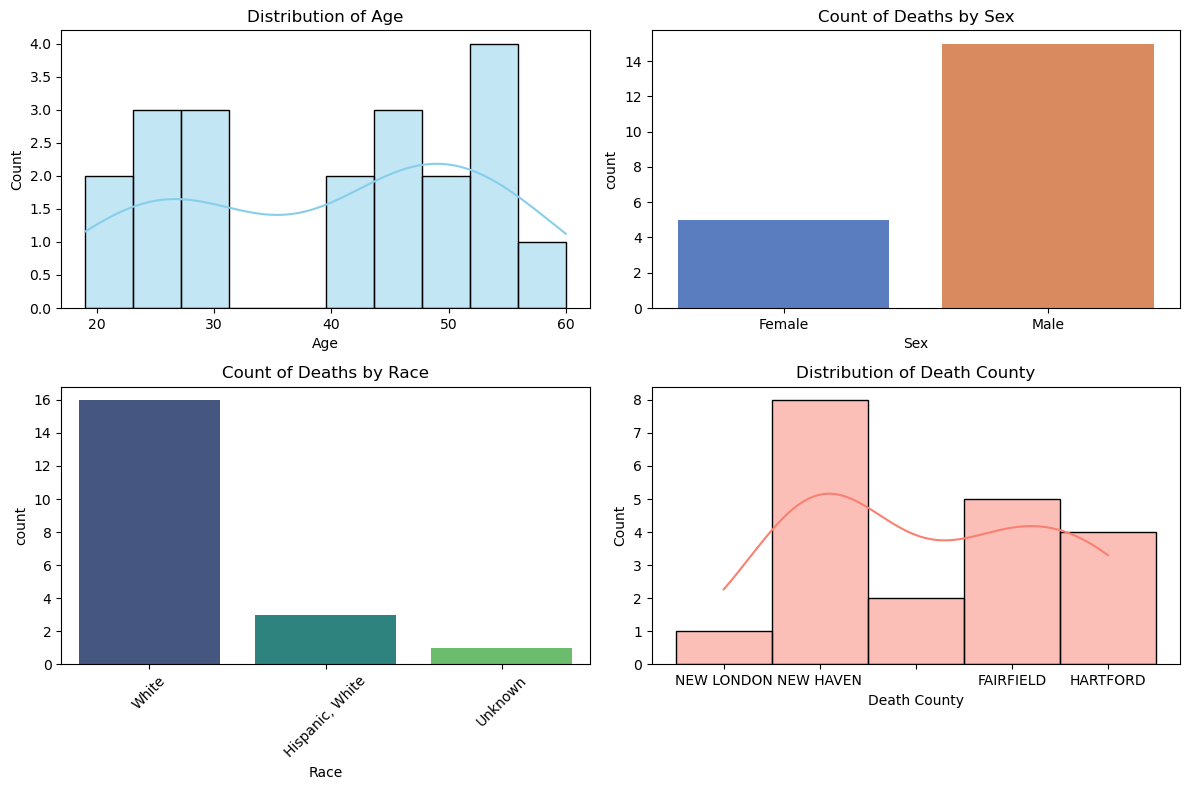

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
import pandas as pd

def retrieve_data_from_mongodb(db_name, collection_name, limit=20):
    try:
        # Connect to MongoDB
        client = MongoClient('localhost', 27017)
        db = client[db_name]
        collection = db[collection_name]
        
        # Retrieve data from MongoDB
        cursor = collection.find().limit(limit)
        
        # Convert cursor to DataFrame
        df = pd.DataFrame(cursor)
        
        print("Data retrieved successfully from MongoDB.")
        return df
    except Exception as e:
        print("An error occurred:", e)
    finally:
        # Close the MongoDB connection
        client.close()

# Define the database name and collection name
db_name = 'HealthCare'
collection_name = 'DeathRelatedDrug'
limit = 20  # Number of records to retrieve

# Retrieve data from MongoDB
df = retrieve_data_from_mongodb(db_name, collection_name, limit)

# Visualize the overall trends for the first 20 records
plt.figure(figsize=(12, 8))

# Plot 1: Distribution of Age
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age')

# Plot 2: Count of Deaths by Sex
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Sex', palette='muted')
plt.title('Count of Deaths by Sex')

# Plot 3: Count of Deaths by Race
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Race', palette='viridis')
plt.title('Count of Deaths by Race')
plt.xticks(rotation=45)

# Plot 4: Distribution of Death County
plt.subplot(2, 2, 4)
sns.histplot(df['Death County'], bins=5, kde=True, color='salmon')
plt.title('Distribution of Death County')

plt.tight_layout()
plt.show()


Data extracted successfully from MongoDB.


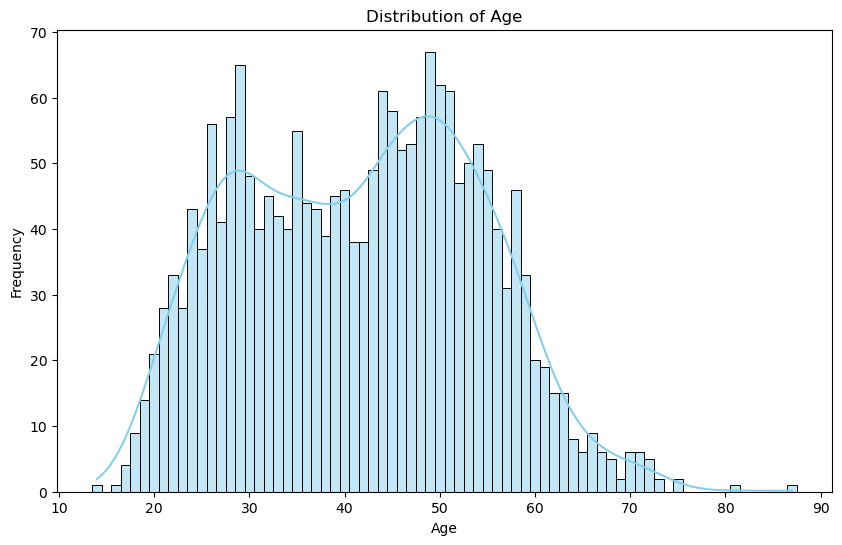

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
import pandas as pd

def extract_data_from_mongodb(db_name, collection_name):
    try:
        # Connect to MongoDB
        client = MongoClient('localhost', 27017)
        db = client[db_name]
        collection = db[collection_name]
        
        # Extract data from MongoDB collection
        data = list(collection.find().limit(2000))  # Limit to first 2000 records
        print("Data extracted successfully from MongoDB.")
        return data
    except Exception as e:
        print("An error occurred:", e)
    finally:
        # Close the MongoDB connection
        client.close()

# Example usage
db_name = 'HealthCare'
collection_name = 'DeathRelatedDrug'
extracted_data = extract_data_from_mongodb(db_name, collection_name)

# Convert extracted data to DataFrame
df = pd.DataFrame(extracted_data)

# Data Visualization
# Check if 'Age' column exists before plotting
if 'Age' in df.columns:
    # Example: Histogram of Age
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Age' does not exist in the DataFrame.")


Data extracted successfully from MongoDB.


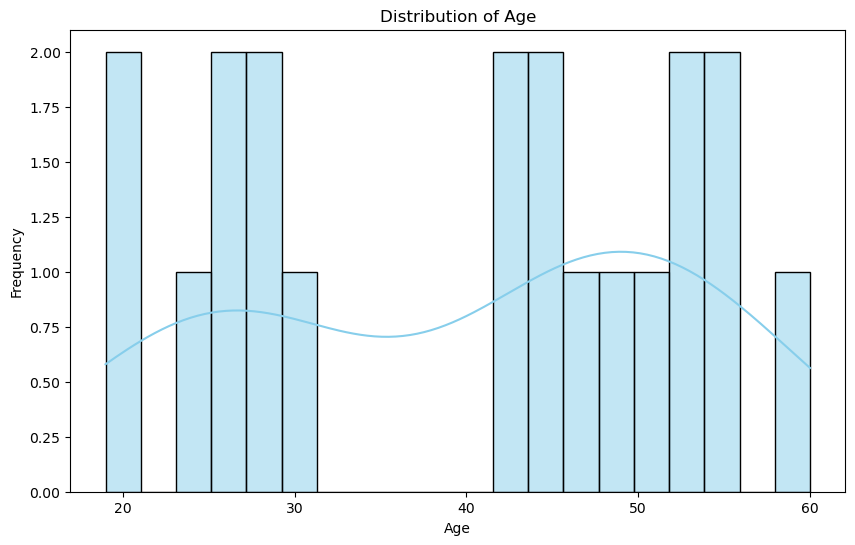

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
import pandas as pd

def extract_data_from_mongodb(db_name, collection_name):
    try:
        # Connect to MongoDB
        client = MongoClient('localhost', 27017)
        db = client[db_name]
        collection = db[collection_name]
        
        # Extract data from MongoDB collection
        data = list(collection.find().limit(20))  # Limit to first 20 records
        print("Data extracted successfully from MongoDB.")
        return data
    except Exception as e:
        print("An error occurred:", e)
    finally:
        # Close the MongoDB connection
        client.close()

# Example usage
db_name = 'HealthCare'
collection_name = 'DeathRelatedDrug'
extracted_data = extract_data_from_mongodb(db_name, collection_name)

# Convert extracted data to DataFrame
df = pd.DataFrame(extracted_data)

# Data Visualization
# Check if 'Age' column exists before plotting
if 'Age' in df.columns:
    # Example: Histogram of Age
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Age' does not exist in the DataFrame.")


Data extracted successfully from MongoDB.


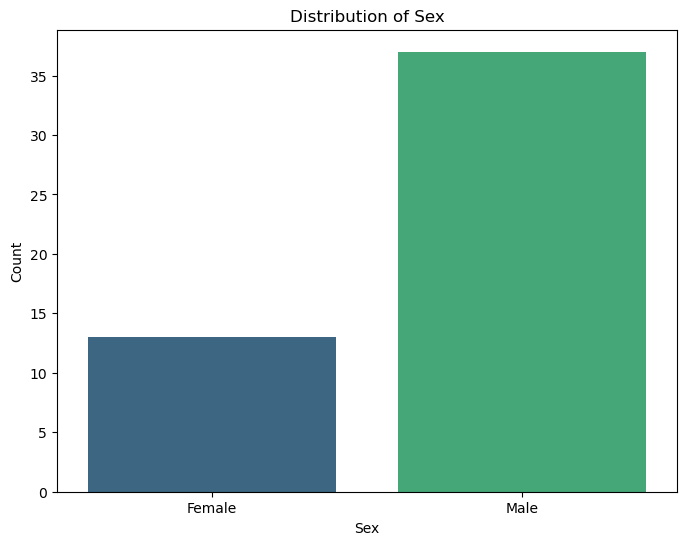

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient
import pandas as pd

def extract_data_from_mongodb(db_name, collection_name, limit=50):
    try:
        # Connect to MongoDB
        client = MongoClient('localhost', 27017)
        db = client[db_name]
        collection = db[collection_name]
        
        # Extract data from MongoDB collection
        data = list(collection.find().limit(limit))
        print("Data extracted successfully from MongoDB.")
        return data
    except Exception as e:
        print("An error occurred:", e)
    finally:
        # Close the MongoDB connection
        client.close()

# Example usage
db_name = 'HealthCare'
collection_name = 'DeathRelatedDrug'
extracted_data = extract_data_from_mongodb(db_name, collection_name)

# Convert extracted data to DataFrame
df = pd.DataFrame(extracted_data)

# Check if 'Sex' column exists before plotting
if 'Sex' in df.columns:
    # Plot a bar chart
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='Sex', palette='viridis')
    plt.title('Distribution of Sex')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'Sex' does not exist in the DataFrame.")


Data extracted successfully from MongoDB.


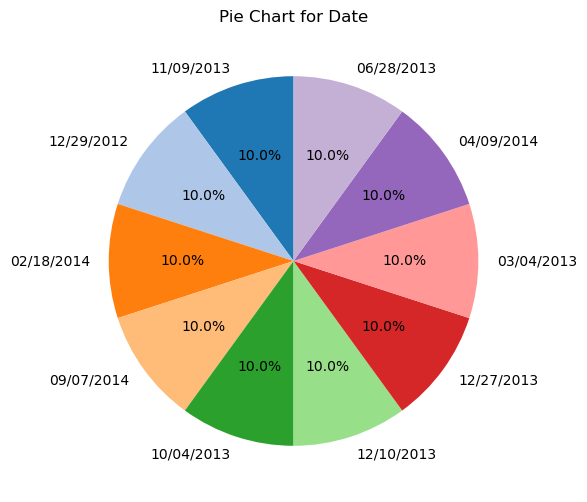

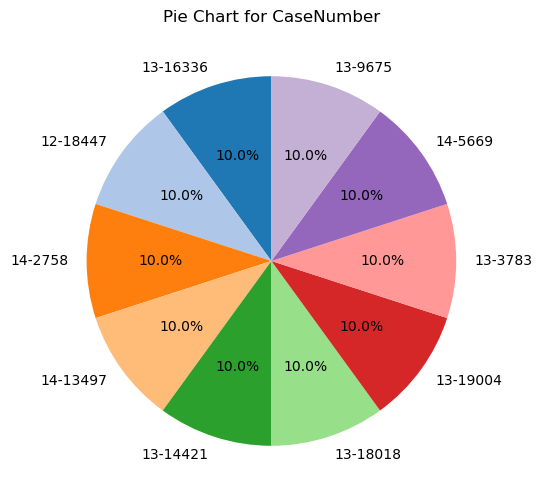

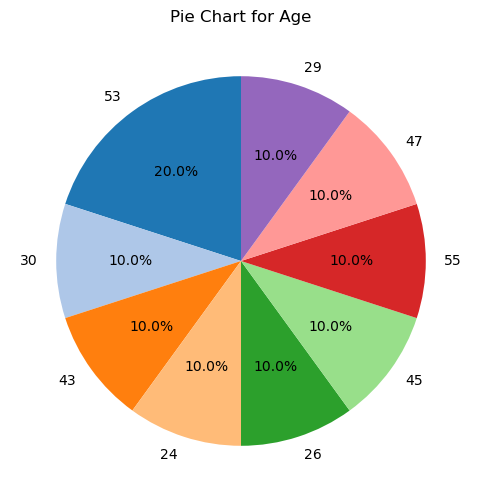

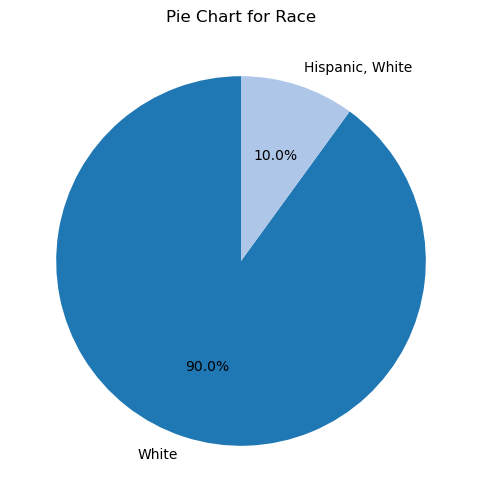

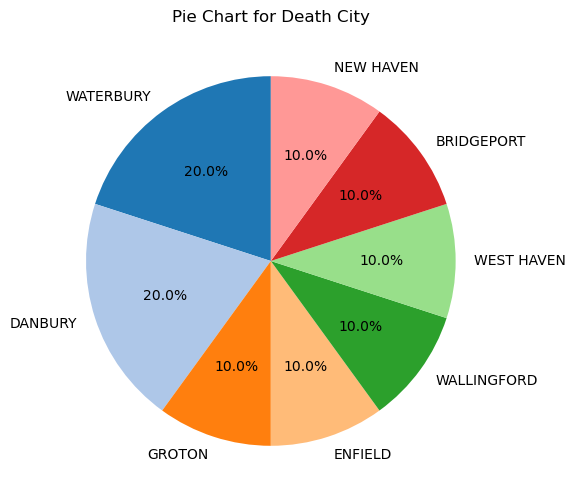

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
from pymongo import MongoClient

def extract_data_from_mongodb(db_name, collection_name, limit=10):
    try:
        # Connect to MongoDB
        client = MongoClient('localhost', 27017)
        db = client[db_name]
        collection = db[collection_name]
        
        # Extract data from MongoDB collection
        data = list(collection.find().limit(limit))
        print("Data extracted successfully from MongoDB.")
        return data
    except Exception as e:
        print("An error occurred:", e)
    finally:
        # Close the MongoDB connection
        client.close()

# Example usage
db_name = 'HealthCare'
collection_name = 'DeathRelatedDrug'
extracted_data = extract_data_from_mongodb(db_name, collection_name)

# Convert extracted data to DataFrame
df = pd.DataFrame(extracted_data)

# Select the columns for the pie chart
columns_for_pie_chart = ['Date','CaseNumber', 'Age', 'Race', 'Death City']

# Filter the DataFrame to include only the selected columns
df_for_pie_chart = df[columns_for_pie_chart]

# Plot a pie chart for each selected column
for column in columns_for_pie_chart:
    plt.figure(figsize=(8, 6))
    counts = df_for_pie_chart[column].value_counts()
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
    plt.title(f'Pie Chart for {column}')
    plt.ylabel('')
    plt.show()


Data extracted successfully from MongoDB.


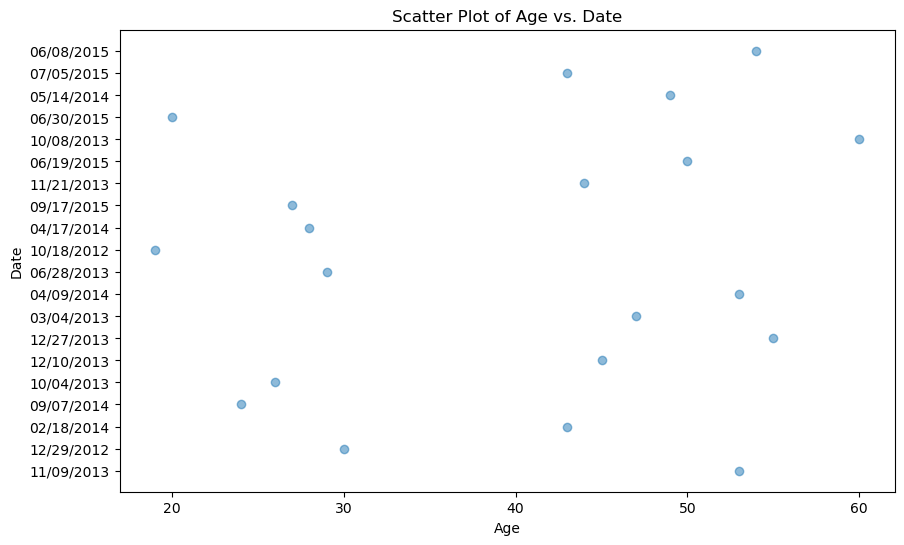

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
from pymongo import MongoClient

def extract_data_from_mongodb(db_name, collection_name, limit=20):
    try:
        # Connect to MongoDB
        client = MongoClient('localhost', 27017)
        db = client[db_name]
        collection = db[collection_name]
        
        # Extract data from MongoDB collection
        data = list(collection.find().limit(limit))
        print("Data extracted successfully from MongoDB.")
        return data
    except Exception as e:
        print("An error occurred:", e)
    finally:
        # Close the MongoDB connection
        client.close()

# Example usage
db_name = 'HealthCare'
collection_name = 'DeathRelatedDrug'
extracted_data = extract_data_from_mongodb(db_name, collection_name)

# Convert extracted data to DataFrame
df = pd.DataFrame(extracted_data)

# Filter the DataFrame to include only the necessary columns
df_for_scatter = df[['Date', 'Age']]

# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_for_scatter['Age'], df_for_scatter['Date'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Date')
plt.xlabel('Age')
plt.ylabel('Date')
plt.show()


Data extracted successfully from MongoDB.


<Figure size 1000x600 with 0 Axes>

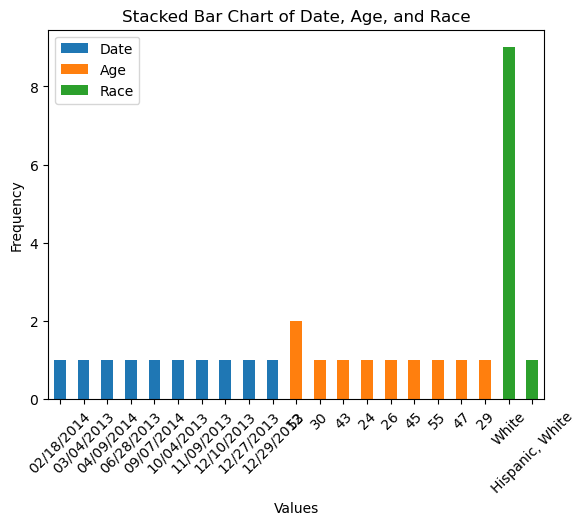

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
from pymongo import MongoClient

def extract_data_from_mongodb(db_name, collection_name, limit=10):
    try:
        # Connect to MongoDB
        client = MongoClient('localhost', 27017)
        db = client[db_name]
        collection = db[collection_name]
        
        # Extract data from MongoDB collection
        data = list(collection.find().limit(limit))
        print("Data extracted successfully from MongoDB.")
        return data
    except Exception as e:
        print("An error occurred:", e)
    finally:
        # Close the MongoDB connection
        client.close()

# Example usage
db_name = 'HealthCare'
collection_name = 'DeathRelatedDrug'
extracted_data = extract_data_from_mongodb(db_name, collection_name)

# Convert extracted data to DataFrame
df = pd.DataFrame(extracted_data)

# Filter the DataFrame to include only the necessary columns
df_for_plot = df[['Date', 'Age', 'Race']]

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
df_for_plot[['Date', 'Age', 'Race']].apply(pd.value_counts).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Date, Age, and Race')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
pip install SQLAlchemy


In [ ]:
pip install psycopg2


In [ ]:
import pandas as pd
from sqlalchemy import create_engine

def load_data_to_sql(data, db_url, table_name):
    try:
        # Create SQLAlchemy engine
        engine = create_engine(db_url)
        
        # Write DataFrame to SQL table
        data.to_sql(table_name, engine, if_exists='replace', index=False)
        
        print("Data loaded into SQL table successfully.")
    except Exception as e:
        print("An error occurred:", e)

# Example usage
db_url = 'postgresql://myuser:Snowy62@ @localhost:27017/DeathRelatedDrug'  # Replace with your database URL
table_name = 'death_related_drug'  # Replace with the desired table name

# Assuming 'df' contains your extracted dataset as a DataFrame
# Replace 'df' with your actual DataFrame variable name
load_data_to_sql(df, db_url, table_name)
